In [ ]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import openai
import os
import pickle

client_credentials_managerMan = SpotifyClientCredentials(client_id="", client_secret="")
sp = spotipy.Spotify(client_credentials_manager = client_credentials_managerMan)

In [3]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

# Example: Using Spotify's "Global Top 50" playlist
playlist_id = '37i9dQZEVXbMDoHDwVN2tF'  # Replace with other playlist IDs to get more songs
tracks = get_playlist_tracks('spotify', playlist_id)

# Extract track IDs
track_ids = [track['track']['id'] for track in tracks]

# To get 500 unique tracks, you may need to merge tracks from several playlists
# For simplicity, let's assume you already have a list of 500 unique track IDs
# track_ids = [...]

# Remove duplicates if any
track_ids = list(set(track_ids))

print(track_ids)

['3hRV0jL3vUpRrcy398teAU', '7yq4Qj7cqayVTp3FF9CWbm', '7CyPwkp0oE8Ro9Dd5CUDjW', '4Dvkj6JhhA12EX05fT7y2e', '6dOtVTDdiauQNBQEDOtlAB', '5Z0UnEtpLDQyYlWwgi8m9C', '5AJ9hqTS2wcFQCELCFRO7A', '17phhZDn6oGtzMe56NuWvj', '4ZJ4vzLQekI0WntDbanNC7', '7iabz12vAuVQYyekFIWJxD', '1C84d9abZVKWHT2YYpoean', '5uQ7de4EWjb3rkcFxyEOpu', '331l3xABO0HMr1Kkyh2LZq', '0mflMxspEfB0VbI1kyLiAv', '63pLfjK6FvcYJYMGwtHjd6', '629DixmZGHc7ILtEntuiWE', '2qSkIjg1o9h3YT9RAgYN75', '1pymWRCuZfCd0zdiBJo0Hj', '2QjOHCTQ1Jl3zawyYOpxh6', '1bjeWoagtHmUKputLVyDxQ', '51eSHglvG1RJXtL3qI5trr', '6XjDF6nds4DE2BBbagZol6', '2uqYupMHANxnwgeiXTZXzd', '51ZQ1vr10ffzbwIjDCwqm4', '42VsgItocQwOQC3XWZ8JNA', '6a9Z1jUms915w4O7N1PxjY', '2HYFX63wP3otVIvopRS99Z', '5Uptvz6j1sjDKxidAcnH2L', '5XeFesFbtLpXzIVDNQP22n', '1BxfuPKGuaTgP7aM0Bbdwr', '7bywjHOc0wSjGGbj04XbVi', '3qhlB30KknSejmIvZZLjOD', '5N3hjp1WNayUPZrA8kJmJP', '5fZJQrFKWQLb7FpJXZ1g7K', '2Zo1PcszsT9WQ0ANntJbID', '1aKvZDoLGkNMxoRYgkckZG', '2GxrNKugF82CnoRFbQfzPf', '0WbMK4wrZ1wFSty9F7FCgu', '7221xIgOnu

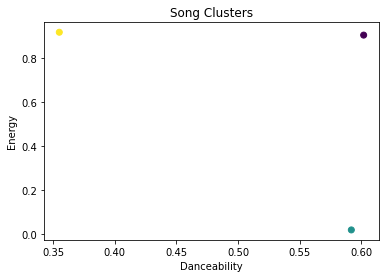

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fetch audio features for multiple songs
song_ids = ['3n3Ppam7vgaVa1iaRUc9Lp', '4VqPOruhp5EdPBeR92t6lQ', '6rqhFgbbKwnb9MLmUQDhG6']  # Add more song IDs
features = []

for song_id in song_ids:
    audio_features = sp.audio_features(song_id)[0]
    features.append(audio_features)

# Convert to DataFrame
df = pd.DataFrame(features)

# Select features for clustering
X = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['danceability'], df['energy'], c=df['cluster'])
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Song Clusters')
plt.show()

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Fetch data (for example purposes, only a few songs are used)
song_ids = ['3n3Ppam7vgaVa1iaRUc9Lp', '4VqPOruhp5EdPBeR92t6lQ', '6rqhFgbbKwnb9MLmUQDhG6']  # Add more song IDs
features = []
popularity = []

for song_id in song_ids:
    audio_features = sp.audio_features(song_id)[0]
    track_info = sp.track(song_id)
    features.append(audio_features)
    popularity.append(track_info['popularity'])

# Convert to DataFrame
df = pd.DataFrame(features)
df['popularity'] = popularity

# Select features for prediction
X = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = df['popularity']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Predicted Popularity:", y_pred)
print("Actual Popularity:", y_test.values)

Predicted Popularity: [67.78983498]
Actual Popularity: [58]


In [10]:
openai.api_key = ''

In [14]:
import json

In [26]:
def generate_song_description(features):
    prompt = f"""
    Here are the audio features of a song:
    - Danceability: {features['danceability']}
    - Energy: {features['energy']}
    - Loudness: {features['loudness']}
    - Speechiness: {features['speechiness']}
    - Acousticness: {features['acousticness']}
    - Instrumentalness: {features['instrumentalness']}
    - Liveness: {features['liveness']}
    - Valence: {features['valence']}
    - Tempo: {features['tempo']}

    Generate a detailed description of the song based on these features.
    """

    client = openai.OpenAI(api_key='')
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "system", "content": prompt}],
        max_tokens=150
    )


    content =  content = response.choices[0].message.content
    print(content)
    print("this is the content:" + content)
    return content

# Example usage
song_features = {
    'danceability': 0.808,
    'energy': 0.626,
    'loudness': -11.840,
    'speechiness': 0.168,
    'acousticness': 0.00187,
    'instrumentalness': 0.159,
    'liveness': 0.376,
    'valence': 0.473,
    'tempo': 123.994
}

description = generate_song_description(song_features)
print(description)

This song has a high danceability score of 0.808, indicating that it has a strong beat and rhythm that is likely to make you want to move and dance. The energy level is moderate at 0.626, suggesting that the song is lively and upbeat without being overly intense. 

With a loudness of -11.84, the song is likely to have a balanced volume that is not too quiet or too loud. The speechiness score of 0.168 suggests that there are vocals in the song, but it is not dominated by lyrics. 

The low acousticness score of 0.00187 indicates that the song is not very acoustic and likely features electronic or amplified sounds. The instrumentalness score of 0.
this is the content:This song has a high danceability score of 0.808, indicating that it has a strong beat and rhythm that is likely to make you want to move and dance. The energy level is moderate at 0.626, suggesting that the song is lively and upbeat without being overly intense. 

With a loudness of -11.84, the song is likely to have a balan